# Predict price diff for BTC_ETC

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/5min/BTC_ETC.csv', index_col=0)

In [3]:
df.head()

,open,high,low,close,volume
datetime,,,,,
1474205100,0.002157,0.002166,0.002157,0.002157,1.445601
1474205400,0.002166,0.002167,0.002152,0.002166,6.873661
1474205700,0.002161,0.002166,0.002157,0.002166,0.183290
1474206000,0.002157,0.002166,0.002157,0.002164,0.052700
1474206300,0.002162,0.002168,0.002162,0.002168,3.065969


In [4]:
max_lag = 12
for lag in range(1, max_lag+1):
    df['close-' + str(lag)] = df['close'] - df.shift(lag)['close']

In [5]:
df.head(13)

,open,high,low,close,volume,close-1,close-2,close-3,close-4,close-5,close-6,close-7,close-8,close-9,close-10,close-11,close-12
datetime,,,,,,,,,,,,,,,,,
1474205100,0.002157,0.002166,0.002157,0.002157,1.445601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1474205400,0.002166,0.002167,0.002152,0.002166,6.873661,9.220000e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1474205700,0.002161,0.002166,0.002157,0.002166,0.183290,-2.200000e-07,9.000000e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1474206000,0.002157,0.002166,0.002157,0.002164,0.052700,-1.990000e-06,-2.210000e-06,0.000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1474206300,0.002162,0.002168,0.002162,0.002168,3.065969,3.550000e-06,1.560000e-06,0.000001,0.000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1474206600,0.002164,0.002168,0.002158,0.002158,1.528710,-9.330000e-06,-5.780000e-06,-0.000008,-0.000008,0.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1474206900,0.002159,0.002168,0.002159,0.002168,3.667910,9.350000e-06,2.000000e-08,0.000004,0.000002,0.000001,0.000011,NaN,NaN,NaN,NaN,NaN,NaN
1474207200,0.002161,0.002166,0.002155,0.002157,13.054269,-1.104000e-05,-1.690000e-06,-0.000011,-0.000007,-0.000009,-0.000010,-4.600000e-07,NaN,NaN,NaN,NaN,NaN
1474207500,0.002157,0.002161,0.002155,0.002156,5.692200,-7.000000e-08,-1.111000e-05,-0.000002,-0.000011,-0.000008,-0.000010,-9.750000e-06,-5.300000e-07,NaN,NaN,NaN,NaN


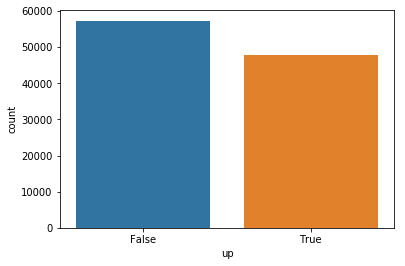

In [9]:
df['up'] = df['close'] < df.shift(-1)['close']
sns.countplot('up', data=df)
plt.show()

In [10]:
df['up'].value_counts(normalize=True)

False    0.545063
True     0.454937
Name: up, dtype: float64

In [17]:
df.dropna(inplace=True)
X = df[['close-1', 'close-2', 'close-3', 'close-4', 'close-5', 'close-6', 'close-6', 'close-7', 'close-8', 'close-9', 'close-10', 'close-11', 'close-12']].values
y = df['up'].astype(int).values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=0)


In [70]:
rf = RandomForestClassifier(n_jobs=4, random_state=0, verbose=2, n_estimators=20)
rf.fit(X_train, y_train)

building tree 1 of 20building tree 2 of 20

building tree 4 of 20building tree 3 of 20

building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    2.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=4,
            oob_score=False, random_state=0, verbose=2, warm_start=False)

In [71]:
rf.score(X_test, y_test)

[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


0.55158503634357037

In [72]:
sgd = SGDClassifier(loss="hinge", penalty="l2", verbose=2)
sgd.fit(X_train, y_train)

-- Epoch 1
Norm: 2.04, NNZs: 13, Bias: -0.856465, T: 78831, Avg. loss: 2.734453
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.96, NNZs: 13, Bias: -0.613246, T: 157662, Avg. loss: 1.200186
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.24, NNZs: 13, Bias: 0.586501, T: 236493, Avg. loss: 1.082998
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 1.32, NNZs: 13, Bias: -0.408396, T: 315324, Avg. loss: 1.043440
Total training time: 0.06 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 13, Bias: -0.787834, T: 394155, Avg. loss: 1.015892
Total training time: 0.07 seconds.


/home/vampire/PycharmProjects/mikasa_ed/venv/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=2, warm_start=False)

In [73]:
sgd.score(X_test, y_test)

0.54644746356128937

In [74]:
from sklearn import svm
svc = svm.SVC(verbose=2)
svc.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=2)

In [76]:
svc.score(X_test, y_test)

0.55984320888990369

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(verbose=2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

[LibLinear]

0.54926361456787309

In [86]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.54789359515926472

In [87]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5381512349202725

In [88]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.52783803326102674

In [89]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.56463827682003276

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(max_depth=4)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.57377984968128626

In [25]:
import numpy as np

np.random.seed(0)

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense


def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [26]:
estimator = KerasClassifier(build_fn=create_baseline, nb_epoch=100, batch_size=10, verbose=1)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/10
94596/94596 [==============================] - 10s - loss: 0.6801 - acc: 0.5568    
Epoch 2/10
94596/94596 [==============================] - 10s - loss: 0.6773 - acc: 0.5655    
Epoch 3/10
94596/94596 [==============================] - 10s - loss: 0.6767 - acc: 0.5677    
Epoch 4/10
94596/94596 [==============================] - 11s - loss: 0.6766 - acc: 0.5664    
Epoch 5/10
94596/94596 [==============================] - 10s - loss: 0.6762 - acc: 0.5651    
Epoch 6/10
94596/94596 [==============================] - 10s - loss: 0.6760 - acc: 0.5692    
Epoch 7/10
94596/94596 [==============================] - 10s - loss: 0.6757 - acc: 0.5690    
Epoch 8/10
94596/94596 [==============================] - 10s - loss: 0.6755 - acc: 0.5688    
Epoch 9/10
94596/94596 [==============================] - 10s - loss: 0.6753 - acc: 0.5689    
Epoch 10/10
94596/94596 [==============================] - 11s - loss: 0.6800 - acc: 0.5600    
Epoch 2/10
94596/94596 [=========================